In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
df=[784
,3332
,10774
,36321]
T1=[[5.24691E-14
,1.2037E-13
,6.08025E-13
,2.34259E-12
],[2.46914E-13
,1.42284E-12
,4.6821E-12
,1.43827E-11
],[3.64583E-14
,5.20833E-14
,3.03819E-13
,1.17014E-12
],[3.64583E-14
,3.59375E-13
,1.10417E-12
,2.52431E-12
]]
T2=[[5.55556E-14
,1.11111E-13
,6.04938E-13
,2.33642E-12
],[2.5E-13
,1.43519E-12
,4.67593E-12
,1.44136E-11
],[3.125E-14
,5.55556E-14
,3.09028E-13
,1.17708E-12
],[4.16667E-14
,3.66319E-13
,1.10938E-12
,2.52431E-12
]]
T3=[[5.55556E-14
,1.14198E-13
,6.11111E-13
,2.33951E-12
],[2.5E-13
,1.42593E-12
,4.67593E-12
,1.44136E-11
],[3.47222E-14
,5.55556E-14
,3.10764E-13
,1.17535E-12
],[4.16667E-14
,3.73264E-13
,1.10938E-12
,2.54167E-12
]]
T4=[[5.55556E-14
,1.14198E-13
,6.11111E-13
,2.34877E-12
],[2.46914E-13
,1.4537E-12
,4.70988E-12
,1.44444E-11
],[3.29861E-14
,5.55556E-14
,3.09028E-13
,1.18229E-12
],[4.34028E-14
,3.76736E-13
,1.12326E-12
,2.55729E-12
]]

In [16]:
def delta(x):
    return len(x)*np.sum(x**2)-(np.sum(x))**2
def intercepto(x,y):
    c=(np.sum(x**2)*np.sum(y)-np.sum(x)*np.sum(x*y))
    return c/delta(x)
def pendiente(x,y):
    m= len(x)*np.sum(x*y)-np.sum(x)*np.sum(y)
    return m/delta(x)
m=np.zeros((len(T1), len(T1)))
c=np.zeros((len(T1), len(T1)))
df=np.array(df)
T1=np.array(T1)
T2=np.array(T2)
T3=np.array(T3)
T4=np.array(T4)
for i in range(len(T1)):
    m[0][i]=pendiente(df,T1[i])
    c[0][i]=intercepto(df,T1[i])
for i in range(len(T1)):
    m[1][i]=pendiente(df,T2[i])
    c[1][i]=intercepto(df,T2[i])
for i in range(len(T1)):
    m[2][i]=pendiente(df,T3[i])
    c[2][i]=intercepto(df,T3[i])
for i in range(len(T1)):
    m[3][i]=pendiente(df,T4[i])
    c[3][i]=intercepto(df,T4[i])    

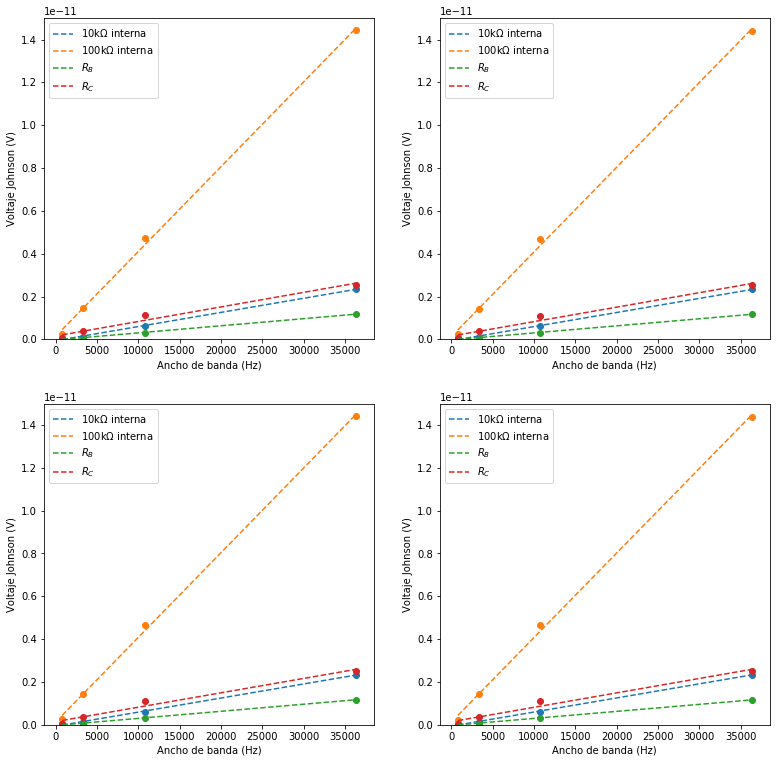

In [33]:
R=["10k"+r"$\Omega$"+ " interna","100k"+r"$\Omega$"+ " interna", r"$R_B$", r"$R_C$"]
T=[96.2,
89.5,
84.1,
78.5
]
plt.figure(figsize=(13,13))
plt.subplot(2,2,4)
for i in range(len(T1)):
    plt.scatter(df,T1[i])
    plt.plot(df,m[0][i]*df+c[0][i],"--", label=R[i])
plt.ylim(0,1.5E-11)
plt.legend(loc=2)

plt.xlabel("Ancho de banda (Hz)")
plt.ylabel("Voltaje Johnson (V)")
plt.subplot(2,2,3)
for i in range(len(T2)):
    plt.scatter(df,T2[i])
    plt.plot(df,m[1][i]*df+c[1][i],"--", label=R[i])
plt.ylim(0,1.5E-11)
plt.legend(loc=2)

plt.xlabel("Ancho de banda (Hz)")
plt.ylabel("Voltaje Johnson (V)")
plt.subplot(2,2,2)
for i in range(len(T3)):
    plt.scatter(df,T3[i])
    plt.plot(df,m[2][i]*df+c[2][i],"--", label=R[i])
plt.ylim(0,1.5E-11)
plt.legend(loc=2)

plt.xlabel("Ancho de banda (Hz)")
plt.ylabel("Voltaje Johnson (V)")
plt.subplot(2,2,1)
for i in range(len(T4)):
    plt.scatter(df,T4[i])
    plt.plot(df,m[3][i]*df+c[3][i],"--", label=R[i])
plt.ylim(0,1.5E-11)
plt.legend(loc=2)

plt.xlabel("Ancho de banda (Hz)")
plt.ylabel("Voltaje Johnson (V)")
        
plt.savefig("johnsonVsAnchodeBanda.jpg")        

In [19]:
m

array([[6.58219557e-17, 3.94650308e-16, 3.28188356e-17, 6.73333301e-17],
       [6.57104388e-17, 3.95389758e-16, 3.30492727e-17, 6.71577697e-17],
       [6.57494998e-17, 3.95500577e-16, 3.29406762e-17, 6.75905669e-17],
       [6.60246924e-17, 3.96043400e-16, 3.31777391e-17, 6.79512680e-17]])

In [27]:
kb=np.zeros((len(T1),len(T1)))
r=[9970,
99500,
9960,
98600
]
for i in range(len(T1)):
    for j in range(len(T1)):
        kb[i][j]=m[i][j]/(4*T[i]*r[j])
kb_prom=np.zeros(len(T1))
for k in range(len(T1)):
    kb_prom[k]=np.sum(kb[:,k])/4
kb,kb_prom    

(array([[1.71569687e-23, 1.03075227e-23, 8.56305565e-24, 1.77467207e-24],
        [1.84101015e-23, 1.10999062e-23, 9.26871528e-24, 1.90255107e-24],
        [1.96038472e-23, 1.18159339e-23, 9.83144115e-24, 2.03776072e-24],
        [2.10902428e-23, 1.26762283e-23, 1.06085933e-23, 2.19478004e-24]]),
 array([1.90652901e-23, 1.14748978e-23, 9.56795135e-24, 1.97744098e-24]))

In [32]:
Res=[1.4
,10.3
,100.3
,997
,9970
,99500
,996000
]
V_sf=[0.222
,0.223
,0.228
,0.279
,0.751
,1.39
,1.475
]
V_cf=[0.253
,0.254
,0.26
,0.32
,0.931
,4.3
,6.06
]
Res=np.array(Res)
V_sf=np.array(V_sf)
V_cf=np.array(V_cf)
msf=pendiente(Res[:-2],V_sf[:-2])
mcf=pendiente(Res[:-2],V_cf[:-2])
csf=intercepto(Res[:-2],V_sf[:-2])
ccf=intercepto(Res[:-2],V_sf[:-2])
msf,mcf,csf,ccf

(5.296337237088074e-05,
 6.800593797089962e-05,
 0.2232437595006025,
 0.2232437595006025)

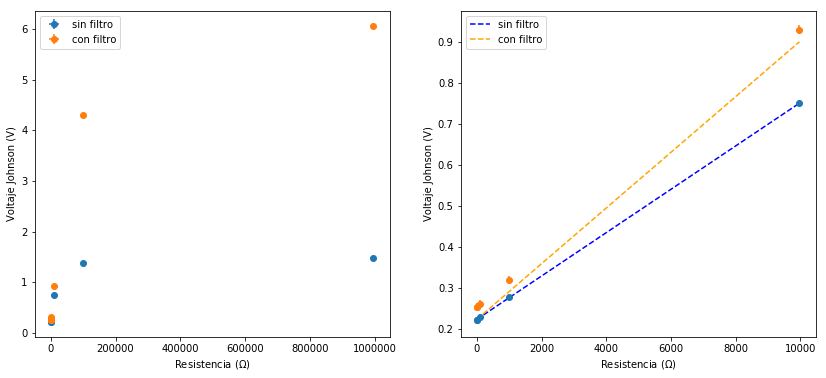

In [43]:
dR=[0.1
,0.2
,0.5
,1
,5
,50
,500
]
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
#plt.scatter(Res,V_sf, label="sin filtro")
plt.errorbar(Res,V_sf,xerr=dR,yerr=np.ones(len(Res))*0.005,fmt='o', label="sin filtro")
plt.errorbar(Res,V_cf,xerr=dR,yerr=np.ones(len(Res))*0.01,fmt='o', label="con filtro")
#plt.scatter(Res,V_cf, label="con filtro")
plt.xlabel("Resistencia "+r"$(\Omega)$")
plt.ylabel("Voltaje Johnson (V)")
plt.legend()
plt.subplot(1,2,2)
plt.errorbar(Res[:-2],V_sf[:-2],xerr=dR[:-2],yerr=np.ones(len(Res[:-2]))*0.005,fmt='o')
plt.errorbar(Res[:-2],V_cf[:-2],xerr=dR[:-2],yerr=np.ones(len(Res[:-2]))*0.01,fmt='o')
plt.plot(Res[:-2],msf*Res[:-2]+csf,"--", c="blue",label="sin filtro")

plt.plot(Res[:-2],mcf*Res[:-2]+ccf,"--", c="orange",label="con filtro")

plt.xlabel("Resistencia "+r"$(\Omega)$")
plt.ylabel("Voltaje Johnson (V)")
plt.legend()
plt.savefig("johnsonVsResistencia.jpg")